# Problem 2.54

In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

In [2]:
def deriv(y, t, K):
    """This function computes the derivatives in the Schrödinger equation.
    
    Because the Schrödinger equation is a second order differential equation we must
    break it up into two separate first order differential equations by treating
    $d\psi / dt$ as an indpendent variable.
    
    """
    psi, dpsidt = y
    d2psidt2 = (t**2 - K) * psi
    return dpsidt, d2psidt2

Following the instructions in the problem, let's solve the Schrödinger equation when $K = 0.9$.

In [3]:
X = np.linspace(0, 10)

In [4]:
K = 0.9

In [5]:
psi = scipy.integrate.odeint(deriv, (1, 0), X, args=(K,))[:, 0]

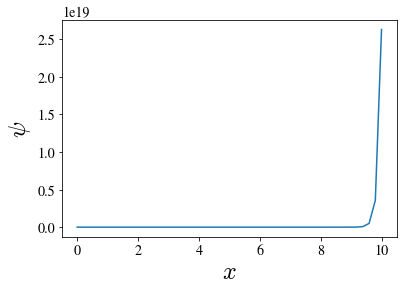

In [6]:
plt.plot(X, psi)
plt.xlabel('$x$')
plt.ylabel('$\psi$');

As expected the wavefunction blows up at large $x$.

Let's now try choosing a $K$ that is slightly above 1 and see what happens.

In [7]:
K = 1.1

In [8]:
psi = scipy.integrate.odeint(deriv, (1, 0), X, args=(K,))[:, 0]

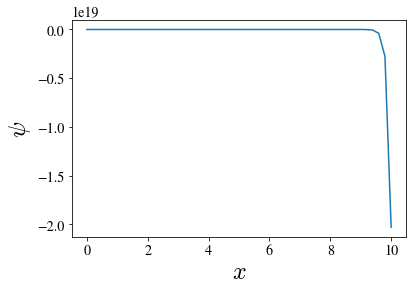

In [9]:
plt.plot(X, psi)
plt.xlabel('$x$')
plt.ylabel('$\psi$');

Once again the wavefunction blows up, but this time in the opposite direction.  This implies that there is a solution within this range.

Let's now generalize the solution by calculating $\psi$ for some arbitrary value $x$ by numerically solving the Schrödinger equation.

In [10]:
def psi(K, x):
    """Find the value of the wavefunction at some position.
    
    In reality this is just the value of the wavefunction at some large value.
    
    """
    return scipy.integrate.odeint(deriv, (1, 0), [0, x], args=(K,))[-1, 0]

Now all we need to do is choose a large value of $x$, say 10 and then find the root of $\psi(K)$.

In [11]:
def wag_the_dog(K_lo=0.9, K_hi=1.1, x_big=10):
    """Find a ground state energy experimentally.
    
    This finds the root of the function that provides the value of the wavefunction at some large value.
    
    """
    return scipy.optimize.brentq(psi, K_lo, K_hi, args=(x_big,), xtol=1e-6)

In [12]:
wag_the_dog()

0.9999999620582672